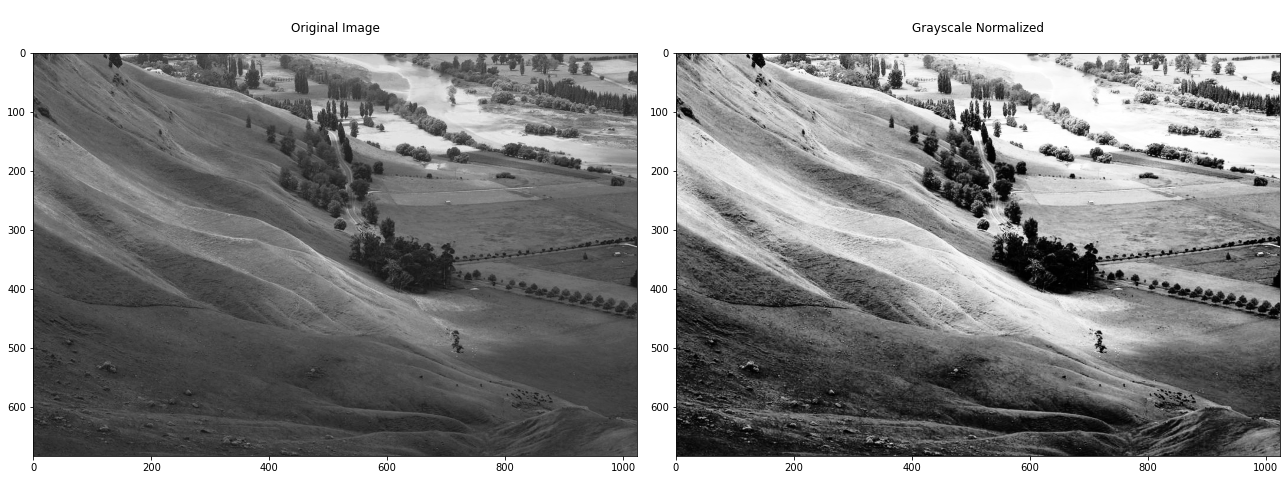

Wall time: 1.01 s


In [5]:
%%time
import numpy as np
from matplotlib import pyplot as plt
#img_org = plt.imread( 'messi5.jpg', 0 ) # 영상 로딩
img_org = plt.imread( 'Unequalized_Hawkes_Bay_NZ.jpg', 0 ) # 영상 로딩

img = np.sum( [0.299, 0.587, 0.114]*img_org, axis=2 ).astype(np.uint8) # 회색조 변환

# 히스토그램 추출 
xarr = np.arange( 0, 256, 1 )
yarr = np.zeros( 256 )

for x in xarr :
    yarr[ x ] = np.count_nonzero( img == x )
pass

# 이미지 평활화
Lmax = np.max( img ) #최대 화소값
N = img.itemsize # 영상 픽셀 개수
h = yarr   # 히스토그램
H = np.cumsum( h ) # 누적 히스토그램, 1 차원 배열

img_norm = img.copy()   # 2차원 픽섹 배열
img_norm_1d = img_norm.ravel() # 영상을 1차원 픽셀 배열로 변환
img_norm_1d = H[ img_norm_1d ]*Lmax/N 

img_norm = img_norm_1d.reshape( img.shape[0], -1 ) # 영상 2차원 배열 변환

# 차트 출력 
fig, charts = plt.subplots( 1, 2, figsize=(18, 18) )
charts = charts.ravel() ; idx = 0 

chart = charts[idx]
chart.imshow( img, cmap='gray' ) ; 
chart.set_title( "\nOriginal Image\n" )
idx +=1 

chart = charts[idx]
chart.imshow( img_norm, cmap='gray' )
chart.set_title( "\nGrayscale Normalized\n" ) 
idx += 1 

plt.tight_layout(); plt.show()